# Homework 1
#### Pauline Lallinec
#### 12251066

### I. [10pt] For two Irish political parties or candidates of your own choice, search and download the files containing their General Elections 2016 political manifesto (i.e., political plan).

In [40]:
import requests
import nltk
import re
import numpy as np

#Getting the manifesto of each party

url_renua = "http://www.renuaireland.com/wp-content/uploads/2016/01/RENUA-Manifesto.pdf"
url_ddi = "https://www.directdemocracyireland.ie/pdf/ddi_manifesto-2016.pdf"

manifesto_renua = requests.get(url_renua)
manifesto_ddi = requests.get(url_ddi)


#Saving the manifesto in local as a PDF file

with open("manifesto_renua.pdf", "wb") as pdffile:
    pdffile.write(manifesto_renua.content)

with open("manifesto_ddi.pdf", "wb") as pdffile:
    pdffile.write(manifesto_ddi.content)

    
%ls #check that the files have correctly downloaded

Homework1-Notebook.ipynb            manifesto_renua.pdf
Lallinec, Pauline_Homework 1.ipynb  manifesto_renua.txt
manifesto_ddi.pdf                   xpdfbin-linux-3.03/
manifesto_ddi.txt                   xpdfbin-linux-3.03.tar.gz


> II. [5pt] Extract the text content from the two files, and save it to two different text files on your computer.

In [41]:
#convert PDF to txt

#Download xpdfbin and decompress it (http://www.foolabs.com/xpdf/download.html)
#If you xpdfbin is not saved in the current folder, please update the code below with the path to it

! xpdfbin-linux-3.03/bin64/pdftotext -enc UTF-8 manifesto_renua.pdf manifesto_renua.txt
! xpdfbin-linux-3.03/bin64/pdftotext -enc UTF-8 manifesto_ddi.pdf manifesto_ddi.txt

%ls #check that the files were correct exported to .txt

Homework1-Notebook.ipynb            manifesto_renua.pdf
Lallinec, Pauline_Homework 1.ipynb  manifesto_renua.txt
manifesto_ddi.pdf                   xpdfbin-linux-3.03/
manifesto_ddi.txt                   xpdfbin-linux-3.03.tar.gz


### III. [5pt]  print the first 500 characters of the text

In [42]:
#Open the Renua manifesto and print the 500 first characters

with open("manifesto_renua.txt", "rb") as manifesto_renua:
    manifesto_renua = manifesto_renua.read().decode('UTF-8')

print("500 first characters of the Renua manifesto:\n", manifesto_renua[0:500])


#Open the Direct Democracy Ireland manifesto and print the 500 first characters

with open("manifesto_ddi.txt", "rb") as manifesto_ddi:
    manifesto_ddi = manifesto_ddi.read().decode('UTF-8')
print("\n")
print("500 first characters of the Direct Democracy Ireland Manifesto:\n", manifesto_ddi[0:500])

500 first characters of the Renua manifesto:
 PARTY MANIFESTO

Rewarding Work Rebuilding Trust

1

2

Party Leader, Lucinda Creighton TD

RENUA Ireland was created to drive change, in a political system that has resisted fundamental change for decades. We will build a transparent accountable state based on ethics, integrity and the reward of merit. In this manifesto, we present one of the most ambitious political programmes ever presented to the Irish people. We want to build a country where work is rewarded and job creators and innovator


500 first characters of the Direct Democracy Ireland Manifesto:
 D I R E C T DEMOCRACY IRELAND A National Citizens Movement

2016 General Election Manifesto

A New Democracy A Stronger Ireland
Equality, Opportunity, Sustainability

Table Of Contents
Preface
1 1 2 3 5 8 11 15 18 20 33 33
Direct Democracy Ireland A National Citizens Movement Published by: Direct Democracy Ireland. Publication Date: Jan 2016 Contact Details: Direct Democracy Ireland

### III. [10pt] print the total number of sentences and the shortest and the longest sentence

In [43]:
#Tokenize it with nltk

sentences_renua = nltk.sent_tokenize(manifesto_renua)
sentences_ddi = nltk.sent_tokenize(manifesto_ddi)


#a Trim which count blank lines ("\n) as new sentences; creates less noise in the data.

def trim_manifesto(manifesto_tokenized):
    '''Assumes input is a text tokenized by sentence
    Will further tokenize the text splitting it where a new line (\n) is found
    Will also remove empty tokens ("") '''
    my_trimmed_list = []
    for i in range(len(manifesto_tokenized)):
        my_trimmed_list += [manifesto_tokenized[i].split("\n")]
        
    #The below is just aestetic: it flattens the array so we won't have a multi-level array
    #and it also remove empty elements (e.g. '')
    my_trimmed_list = [item for sublist in my_trimmed_list for item in sublist if len(item) > 0]
    return(my_trimmed_list)


#Defines variable to return the manifestos broken down by sentences

sentences_renua = trim_manifesto(sentences_renua)
sentences_ddi = trim_manifesto(sentences_ddi)

In [44]:
#print the number of sentences per manifesto

def nb_sent(manifesto_tokenized):
    '''This function returns the number of sentences in a text
    Text input should be tokenized by sentences'''
    return len(manifesto_tokenized)

print("There are", nb_sent(sentences_renua), "sentences in the Renua manifesto and there are", 
      nb_sent(sentences_ddi), "sentences in the DDI manifesto.\n")


#print the longest phrase of the manifesto

def longest_sent(manifesto_tokenized):
    '''Returns the longest sentence in a text tokenized by sentence'''
    word_count = lambda manifesto_tokenized: len(nltk.word_tokenize(manifesto_tokenized))
    return(max(manifesto_tokenized, key =word_count))

print("Renua\'s manifesto longuest sentence is the following:\n" + longest_sent(sentences_renua) + "\n")
print("DDI\'s manifesto longest sentence is the following:\n" + longest_sent(sentences_ddi) + "\n")


#print the shortest sentence
#In order to get a more meaningful result, I decided to trim the manifesto

def shortest_sent(manifesto_tokenized):
    '''Returns the shortest sentence in a text tokenized by sentence'''
    trimmed_manifesto = []
    for sentence in manifesto_tokenized:
        
        #This will remove sentences with no letter in them, such as "1."
        if re.search('[a-zA-Z]', sentence) != None:
            trimmed_manifesto += [sentence]
    word_count = lambda trimmed_manifesto: len(nltk.word_tokenize(trimmed_manifesto))
    return(min(trimmed_manifesto, key = word_count))


print("The shortest sentence in Renua's manifesto as identified by my algorithm is:\n" + shortest_sent(sentences_renua))
print("\nThe shortest sentence in Direct Democracy Ireland's manifesto is:\n"+shortest_sent(sentences_ddi))

There are 1517 sentences in the Renua manifesto and there are 747 sentences in the DDI manifesto.

Renua's manifesto longuest sentence is the following:
RENUA Ireland will: • Commission and introduce a programme of management training that will begin at senior grades within the public sector and be cascaded down over a period of time; Ensure that each department and agency has task-related training programmes in place that are ﬁt for purpose; Ensure that every employee has a clearly deﬁned job description and that their goals for each quarter and year are clearly explained and outlined; Instigate a new, transparent and objective performance management system that is aimed at driving higher performance standards in the public service; Introduce a set of supportive tools and sanctions which will assist underperformers in improving their outputs and support managers in dealing with underperformers after all reasonable steps to improve performance have been taken; Commence an annual audit 

### III. [10pt] print the total number of words and the ratio of unique words to total number of words

In [45]:
#Getting the number of words and printing the results

words_renua = nltk.word_tokenize(manifesto_renua)
words_ddi = nb_words = nltk.word_tokenize(manifesto_ddi)

print("There are", len(words_renua), "words in Renua's manifesto and there are",
      len(words_ddi), "words in Direct Democracy Ireland's manifesto.")


#Getting the number of unique words

unique_words_renua = len(set(words_renua))
unique_words_ddi = len(set(words_ddi))


#Calculating the ratio

ratio_unique_renua = unique_words_renua/len(words_renua)*100
ratio_unique_ddi = (unique_words_ddi/len(words_ddi))*100


print("There are %.2f %% of unique words in Renua's manifesto" % ratio_unique_renua)
print("There are %.2f %% of unique words in Direct Democracy Ireland's manifesto" % ratio_unique_ddi)

There are 31125 words in Renua's manifesto and there are 15276 words in Direct Democracy Ireland's manifesto.
There are 16.74 % of unique words in Renua's manifesto
There are 20.88 % of unique words in Direct Democracy Ireland's manifesto


### III. [5pt]  print the most frequent 20 words.

In [46]:
#Counting the frequency of each words

def common_words(manifesto, n):
    '''returns the n most common words
    assumes the manifesto is tokenized by words'''
    freq = nltk.FreqDist(manifesto)
    result = freq.most_common(n)
    return(result)


most_common_renua = common_words(words_renua, 20)
most_common_ddi = common_words(words_ddi, 20)


#Printing the 20 most common words

print("Renua's manifesto most common words are:")
for i,j in enumerate(most_common_renua):
    print("%s. \"%s\" appears %s times" % (i + 1, j[0], j[1]))

print("\n\nDirect Democracy Ireland's manifesto most common words are:")
for i,j, in enumerate(most_common_ddi):
    print("%s. \"%s\" appears %s times" % (i + 1, j[0], j[1]))

Renua's manifesto most common words are:
1. "the" appears 1393 times
2. "." appears 1234 times
3. "of" appears 1016 times
4. "and" appears 987 times
5. "to" appears 942 times
6. "," appears 631 times
7. "a" appears 575 times
8. "in" appears 566 times
9. "for" appears 403 times
10. "will" appears 372 times
11. "Ireland" appears 372 times
12. "be" appears 354 times
13. "that" appears 346 times
14. "is" appears 320 times
15. "RENUA" appears 264 times
16. "•" appears 252 times
17. "with" appears 206 times
18. "on" appears 180 times
19. "The" appears 175 times
20. "are" appears 174 times


Direct Democracy Ireland's manifesto most common words are:
1. "the" appears 726 times
2. "." appears 632 times
3. "of" appears 474 times
4. "to" appears 471 times
5. "and" appears 449 times
6. "," appears 369 times
7. "a" appears 307 times
8. "in" appears 249 times
9. "is" appears 180 times
10. "for" appears 167 times
11. "Ireland" appears 160 times
12. "that" appears 136 times
13. "will" appears 126 tim

### IV.[15pt] remove the punctuation from the text, transform all words to lower case and remove the stop words

In [47]:
#Trimming the text

def text_trim(manifesto):
    '''Assumes the manifesto is tokenized by words.
    converts the text to lower case
    removes punctuation
    removes English stop words
    '''
    manifesto = nltk.Text(manifesto)
    manifesto = [words.lower() for words in manifesto if words.isalpha()]
    manifesto = [w for w in manifesto if not w in nltk.corpus.stopwords.words('english')]
    return(manifesto)


#Creation of 2 variables per manifestos: 1 variable for the raw text, 1 variable for the text tokenized y words.

trimmed_manifesto_renua_token = text_trim(words_renua)
trimmed_manifesto_renua = " ".join(trimmed_manifesto_renua_token)

trimmed_manifesto_ddi_token = text_trim(words_ddi)
trimmed_manifesto_ddi = " ".join(trimmed_manifesto_ddi_token)

### IV. [5pt]  print the first 500 characters of the cleaned text

In [48]:
print("The 500 first character of Renua's manifesto are:\n" + trimmed_manifesto_renua[:500])
print("\n\nThe 500 first characters of Direct Democracy Ireland's manifesto are:\n" + trimmed_manifesto_ddi[:500])

The 500 first character of Renua's manifesto are:
party manifesto rewarding work rebuilding trust party leader lucinda creighton td renua ireland created drive change political system resisted fundamental change decades build transparent accountable state based ethics integrity reward merit manifesto present one ambitious political programmes ever presented irish people want build country work rewarded job creators innovators valued primarily low tax economy proposal introduce simpliﬁed tax system replacing different rates tax ﬂat rate income t


The 500 first characters of Direct Democracy Ireland's manifesto are:
d r e c democracy ireland national citizens movement general election manifesto new democracy stronger ireland equality opportunity sustainability table contents preface direct democracy ireland national citizens movement published direct democracy ireland publication date jan contact details direct democracy ireland old post o ce reaghstown ardee drectdemocracyeire informat

In [49]:
#Re-using the function 'common words' that we had defined previously

most_common_renua_trimmed = common_words(trimmed_manifesto_renua_token, 20)
most_common_ddi_trimmed = common_words(trimmed_manifesto_ddi_token, 20)


#Printing the 20 most common words

print("Renua's manifesto most common words are:")
for i,j in enumerate(most_common_renua_trimmed):
    print("%s. \"%s\" appears %s times" % (i + 1, j[0], j[1]))

print("\n\nDirect Democracy Ireland's manifesto most common words are:")
for i,j, in enumerate(most_common_ddi_trimmed):
    print("%s. \"%s\" appears %s times" % (i + 1, j[0], j[1]))

Renua's manifesto most common words are:
1. "ireland" appears 372 times
2. "renua" appears 268 times
3. "cost" appears 93 times
4. "system" appears 89 times
5. "tax" appears 88 times
6. "people" appears 82 times
7. "irish" appears 81 times
8. "public" appears 80 times
9. "government" appears 78 times
10. "local" appears 65 times
11. "state" appears 65 times
12. "sector" appears 65 times
13. "must" appears 64 times
14. "development" appears 63 times
15. "believes" appears 62 times
16. "ensure" appears 62 times
17. "national" appears 59 times
18. "care" appears 58 times
19. "access" appears 55 times
20. "policy" appears 55 times


Direct Democracy Ireland's manifesto most common words are:
1. "ireland" appears 161 times
2. "people" appears 134 times
3. "democracy" appears 120 times
4. "direct" appears 103 times
5. "national" appears 68 times
6. "citizens" appears 65 times
7. "irish" appears 63 times
8. "movement" appears 63 times
9. "system" appears 54 times
10. "ddi" appears 50 times
11

### IV - [10pt] on the cleaned text, use a dispersion plot to show the coverage of different issues in the two manifestos, where the issues are: "abortion", "crime", "debt", "economy", "environment", "health", "housing", "infrastructure" , "jobs", "tax".

Renua's manifesto dispersion plot:



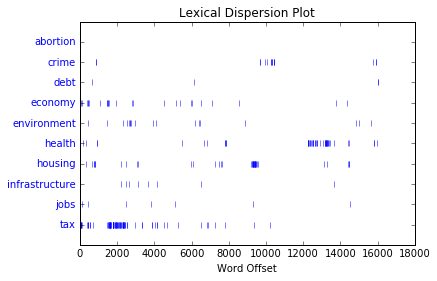



Direct Democracy Ireland's dispersion plot:



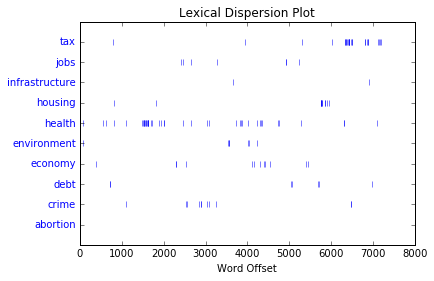

In [50]:
%matplotlib inline

topics_of_interest = [ "abortion", "crime", "debt", "economy", "environment", "health", "housing", 
                      "infrastructure" , "jobs", "tax"]

manifesto_renua_dispersion = nltk.Text(trimmed_manifesto_renua_token)
manifesto_ddi_dispersion = nltk.Text(trimmed_manifesto_ddi_token)

print("Renua's manifesto dispersion plot:\n")
manifesto_renua_dispersion.dispersion_plot(topics_of_interest)

print("\n\nDirect Democracy Ireland's dispersion plot:\n")
manifesto_ddi_dispersion.dispersion_plot(topics_of_interest)

### IV. [20pt] Choose two different methods of summarising and contrasting the two political manifestos to give a better understanding of the characteristics and focus of each. Discuss the advantages and disadvantages of the methods proposed.

#### Method no 1. Deep-diving into the words.

One way to analyze a text is to analyze its vocabulary. The questions answered previously are a good start, and we will start our analysis from them.

I have chosen to rely on the NLTK Brown Corpus to make an analysis of the vocabulary used by each parties:
1. Their nouns, to highlight the particular subjects of interest of these manifestos
2. Their verbs. Descriptive verbs tend to be used to refer to a context, while action verbs are used to introduce a movement
3. Their adverbs. These are often use to appeal to the feelings of people, as opposed to their thinking.

In [51]:
from nltk.corpus import brown


def wordcount_bytype(manifesto, word_type):
    '''manifesto = a plain text manifesto
    word_type = word type as per the NLTK Brown library, type help(nltk.pos_tag()) for more information
    This function returns a list of words from manifesto matching the type specified in word_type'''
    
    #tokenize the manifesto by words
    man_token = nltk.word_tokenize(manifesto)
    
    #apply tags (e.g. "noun", "verbs" to words in the manifesto)
    man_tag = nltk.pos_tag(man_token, tagset='universal')
    
    #create a list ordered by most used words by tags
    common_words = nltk.ConditionalFreqDist((tag, word) for (word, tag) in man_tag)
    
    #filters on the word_type specified by the user
    common_words = common_words[word_type]
    return(common_words)


#Collecting and printing the most common nouns
nouns_renua = wordcount_bytype(trimmed_manifesto_renua, "NOUN")
nouns_ddi = wordcount_bytype(trimmed_manifesto_ddi, "NOUN")


print("Renua's most used nouns:")
for word, count in nouns_renua.most_common(20):
    print("\"%s\", %s occurrences." % (word, count))

print("\n")

print("Direct Democracy Ireland's most used nouns:")
for word, count in nouns_ddi.most_common(20):
    print("\"%s\", %s occurrences." % (word, count))

Renua's most used nouns:
"ireland", 275 occurrences.
"renua", 157 occurrences.
"system", 89 occurrences.
"tax", 88 occurrences.
"people", 82 occurrences.
"government", 78 occurrences.
"cost", 74 occurrences.
"state", 65 occurrences.
"sector", 65 occurrences.
"development", 63 occurrences.
"policy", 55 occurrences.
"access", 55 occurrences.
"care", 55 occurrences.
"services", 51 occurrences.
"health", 50 occurrences.
"industry", 46 occurrences.
"role", 45 occurrences.
"service", 42 occurrences.
"housing", 41 occurrences.
"business", 40 occurrences.


Direct Democracy Ireland's most used nouns:
"people", 134 occurrences.
"democracy", 120 occurrences.
"citizens", 64 occurrences.
"movement", 63 occurrences.
"ireland", 62 occurrences.
"system", 54 occurrences.
"health", 43 occurrences.
"election", 41 occurrences.
"water", 41 occurrences.
"government", 38 occurrences.
"state", 35 occurrences.
"banks", 28 occurrences.
"country", 27 occurrences.
"tax", 26 occurrences.
"ddi", 26 occurrences.
"s

We may deduct from these results that Renua's main topic is the economical state of Ireland: "tax", "system", "cost", "sector", "industry", "housing"

On the other hand, Direct Democracy Ireland may be emphasizing the social aspect of politics, and describes a social movement: "people", "citizens", "movement", "government", "society", "election".


All in all, it looks like Renua's plans for Ireland are focusing on taxes, expenses and solutions for industries and businesses, The economical growth and development of the country seems to be their main focus. They seem to have a macroeconomics approach, taking the country as a whole instead of referring to particular current issues.

Direct Democracy's seems to be focusing on proposing a new polical system for Ireland (democracy, citiens, movement, election, government, state, society). They make a lot of references to the country and to its people. They are taking modern controversies (banks, water, food) to prove their points. Unlike Renua, they do not seem to be emphasizing economy a lot.

In [52]:
#Collecting and printing the most common verbs
verbs_renua = wordcount_bytype(trimmed_manifesto_renua, "VERB")
verbs_ddi = wordcount_bytype(trimmed_manifesto_ddi, "VERB")

for word, count in verbs_renua.most_common(10):
    print(word, count)

print("\n")

for word, count in verbs_ddi.most_common(10):
    print(word, count)

ireland 85
must 64
believes 62
ensure 62
renua 60
believe 41
would 40
make 29
proposing 28
based 25


ireland 94
would 33
must 28
need 21
believe 18
make 18
working 15
ddi 10
ensure 10
paid 10


Both parties seem to be using verbs to describe a vision, which is not unexpected in a political manifesto. I do not see a strong difference between the verbs that each manifesto use.

In [53]:
#Collecting and printing the most common adverbs
adv_renua = wordcount_bytype(trimmed_manifesto_renua, "ADV")
adv_ddi = wordcount_bytype(trimmed_manifesto_ddi, "ADV")

for word, count in adv_renua.most_common(10):
    print(word, count)

print("\n")

for word, count in adv_ddi.most_common(10):
    print(word, count)

also 42
back 14
well 13
currently 12
rather 10
instead 9
therefore 8
far 8
directly 8
best 7


also 23
currently 12
together 12
ever 10
back 9
fully 9
rather 9
never 8
always 7
better 7


This may be far-fetched, but there is some differences here between the 2 manifestos. Renua is using adverbs to contrast or to justify its arguments: "rather", "instead", "therefore". There is only 1 superlative, "best".
Direct Democracy seems to be using more superlatives: "fully", "ever", "never", "always", and the comparative "better". Using this type of vocabulary is sometimes seen as an attempt to bring emotions. Therefore, Direct Democracy's manifesto might be more "emotional" than Renua's.

***

The method above is simple and can easily be replicated. It gives a good view of each parties' main topics of interest and of the kind of language and strategy they use to convince readers to vote for them. The methodology used can easily be applied to other manifestos withvery few or no change to the code used.

What it doesn't outline, however, is how much they refer to these topic. Sure, we do know how many times they use a particular word, but if we don't compare it to another metric such as the total number of words then this figure has no meaning.

Below, I will use different graphic representation to illustrate the content of the manifestos.

***

#### Method no 2. Giving context and illustrating

First, I would like to check whether they tend to re-use vocabulary or not. A rich vocabulary may be a hint that the manifesto equally covers a broad range of topics. If the same vocabulary tends to be re-used, then it may be a hint that the manifesto favours some topics.

Renua's manifesto plot of its 20 most used nouns:



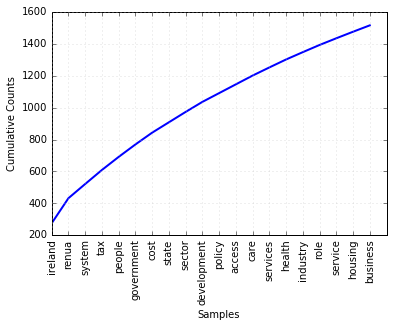


Direct Democracy ireland's plot of its 20 most used nouns:



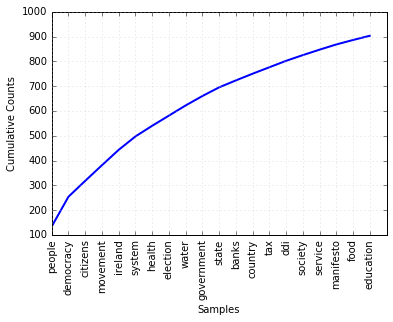

In [54]:
print("Renua's manifesto plot of its 20 most used nouns:\n")
plot_renua = nltk.FreqDist(nouns_renua)
plot_renua.plot(20, cumulative=True)

print("\nDirect Democracy ireland's plot of its 20 most used nouns:\n")
plot_ddi = nltk.FreqDist(nouns_ddi)
plot_ddi.plot(20, cumulative=True)

As we can see, both plots display a curved line, which could mean that both manifestos do not treat all subjects equally. This may mean that some topics are more important to them than others, and thatthey wish to emphasize these subjects on their manifesto.

We can also see that Direct Democracy Ireland's manifesto is visibly more curved than Renua's manifesto, which may mean that Direct Democracy is more 'biased' towards a particular topic that Renua is.

In order to check what their "big" topic is, I have chosen to distribute each manifesto's 20 most common words into 3 general, broader topics: economy, society and welfare. The below section distributes the word counts of these topic to outline their comparative importance.

([<matplotlib.patches.Wedge at 0x7f1dfa8851d0>,
  <matplotlib.text.Text at 0x7f1df5f2cdd8>])

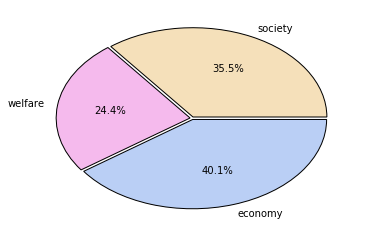

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

#Defining arrays
word_array_renua = []
count_array_renua = []

#Adds the words and the word counts to the arrays
for word, count in nouns_renua.most_common(20):
    word_array_renua += [word]
    count_array_renua += [count]

#Concatenates both arrays in 1 single array
matrix_renua = [word_array_renua] + [count_array_renua]

#Transforms the array into a data frame with Panda
df_renua = pd.DataFrame(matrix_renua, columns=matrix_renua[0])

#Removes the first line of the data frame (it was containing words; words are already the header of the data frame)
df_renua = df_renua.ix[1:]

#Defining categories
df_renua['economy'] = df_renua['tax'] + df_renua['cost'] + df_renua['housing'] + df_renua['development'] + df_renua['industry'] + df_renua['business'] + df_renua['sector']
df_renua['welfare'] = df_renua['care'] + df_renua['health'] + df_renua['access'] + df_renua['service'] + df_renua['services']
df_renua['society'] = df_renua['government'] + df_renua['state'] + df_renua['policy'] + df_renua['people'] + df_renua['system']
total_renua = [int(df_renua['society']), int(df_renua['welfare']), int(df_renua['economy'])]

#Draw a pie
plt.pie(total_renua,
        autopct='%1.1f%%', 
        labels=['society', 'welfare', 'economy'], 
        colors=["#F5E0BA", "#F5BAED", "#BACFF5"],
        explode = [0.015, 0.015, 0.015])

([<matplotlib.patches.Wedge at 0x7f1df554a4a8>,
  <matplotlib.text.Text at 0x7f1df5efe048>])

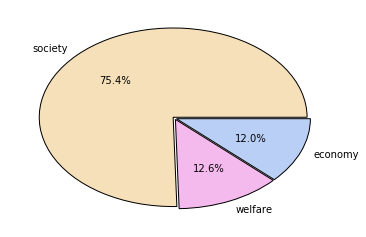

In [56]:
#Same code as above, but for Direct Democracy
word_array_ddi = []
count_array_ddi = []

for word, count in nouns_ddi.most_common(20):
    word_array_ddi += [word]
    count_array_ddi += [count]

matrix_ddi = [word_array_ddi] + [count_array_ddi]

df_ddi = pd.DataFrame(matrix_ddi, columns=matrix_ddi[0])
df_ddi = df_ddi.ix[1:]

df_ddi['society'] = df_ddi['people'] + df_ddi['democracy'] + df_ddi['citizens'] + df_ddi['movement'] + df_ddi['society'] + df_ddi['system'] + df_ddi['election'] + df_ddi['government'] + df_ddi['state'] + df_ddi['country']
df_ddi['economy'] = df_ddi['banks'] + df_ddi['water'] + df_ddi['tax']
df_ddi['welfare'] = df_ddi['health'] + df_ddi['service'] + df_ddi['food'] + df_ddi['education']
total_ddi = [int(df_ddi['society']), int(df_ddi['welfare']), int(df_ddi['economy'])]

plt.pie(total_ddi,
        autopct='%1.1f%%', 
        labels=['society', 'welfare', 'economy'], 
        colors=["#F5E0BA", "#F5BAED", "#BACFF5"],
        explode = [0.015, 0.015, 0.015])

Here we can see that Renua's manifesto main topic of interest is economy, with 40% of its content dedicated to that topic. Direct Democracy Ireland's manifesto is discussing society for three quarters of its content. This may indicate that Renua dedicates more attention to a broad range of topics whilst Direct Democracy Ireland is almost fully covering a topic.

This method has the advantage of showing the "big picture" of what the manifestos are about. Counting words is a first step, but humans often won't see the big picture if they are exposed to 20 different categories. In this method, with have taken close to 20 categories and fit them into broader categories in order to achieve that big picture. Another advantage of this method is that it is visual. Instead of a list of topics, a chart is presented where we can clearly see the biggest piece of the pie. Last but not least, instead of presenting the topics of the manifesto in absolute terms, we provide relative figures, thus giving them more weight and more context.

There are a few disadvantages of this method. The first one, and the biggest one, is that we are getting out of our automated, impartial algorithm. I had to made choice above regarding how to name my categories and what to fit in them. For example, I have chosen to add "water" to "economy" and "food" and "education" to "welfare" and this is debatable. Another disadvantage resulting from that choise is that a human intervention is necessary at that stage to group subject together. Therefore, as of now, while my algorithm in method no1 could be applied as they are to any other manifestos, these algorithms right there would need some work in order to be applied to other manifestos. The content of the categories would need to be updated for each manifestos, and possibly, the names of the categories.